The assignment was provided by **mlcourse.ai**, dataset - https://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r'adult.data', header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns = ['age', 'workclass','fnlwgt','education','education-num','marital-status','occupation', 'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'salary']

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

## Let's have a look at how many men and women are represented in this dataset?

In [7]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [8]:
df['sex'].value_counts(normalize = True)

 Male      0.669205
 Female    0.330795
Name: sex, dtype: float64

It's obvious that there are more data on male in this dataset.

## Lets's find out the average age of women and men

In [9]:
df[['sex', 'age']].groupby('sex').mean()

,age
sex,
Female,36.858230
Male,39.433547


In [10]:
df[['sex', 'age']].groupby('sex').describe()

age                                                    
           count       mean        std   min   25%   50%   75%   max
sex                                                                 
 Female  10771.0  36.858230  14.013697  17.0  25.0  35.0  46.0  90.0
 Male    21790.0  39.433547  13.370630  17.0  29.0  38.0  48.0  90.0

Whilst the the min and max age for both genders are the same, male seem to be older in general

In [11]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

Text(0.5, 1.0, 'Male age distribution')

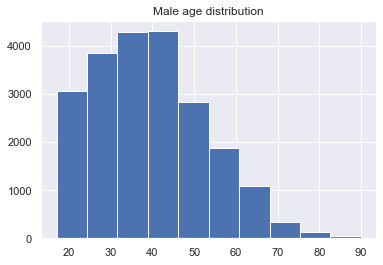

In [12]:
df[df['sex'] == ' Male'][['age']].hist()
plt.title('Male age distribution')

Text(0.5, 1.0, 'Female age distribution')

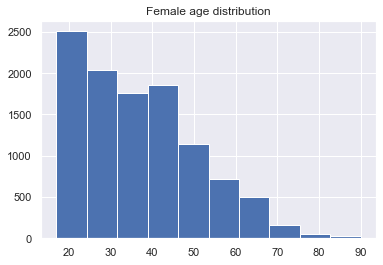

In [13]:
df[df['sex'] == ' Female'][['age']].hist()
plt.title('Female age distribution')

## What are the mean and standard deviation of age for those who earn more than 50K per year and those who earn less than 50K per year?

In [14]:
df[['salary', 'age']].groupby('salary').agg(['mean', 'std'])

age           
             mean        std
salary                      
 <=50K  36.783738  14.020088
 >50K   44.249841  10.519028

salary
 <=50K    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
 >50K     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

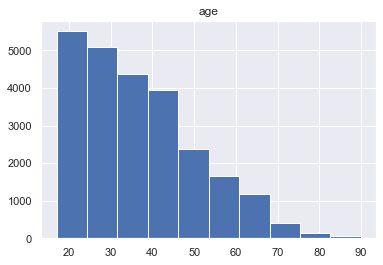

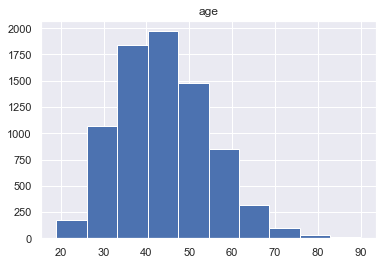

In [15]:
df[['salary', 'age']].groupby('salary').hist()

## Is it true that people who earn more than 50K have at least high school education?

In [16]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
df[df['salary'] == ' >50K']['education'].unique()

array([' HS-grad', ' Masters', ' Bachelors', ' Some-college',
       ' Assoc-voc', ' Doctorate', ' Prof-school', ' Assoc-acdm',
       ' 7th-8th', ' 12th', ' 10th', ' 11th', ' 9th', ' 5th-6th',
       ' 1st-4th'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

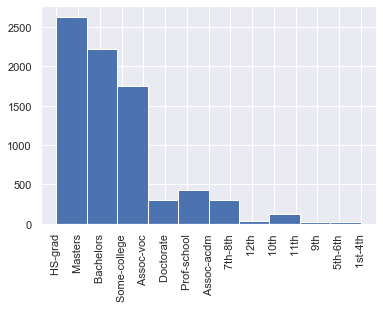

In [18]:
df[df['salary'] == ' >50K']['education'].hist()
plt.xticks(rotation = 90)

We can see that most of those who earn more than 50K a year have at least Bachelors degree. Although there are fair amount of those who have no degree and are in the same salary group

In [19]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [20]:
non_college = [' 11th', ' 9th',' 7th-8th',' 5th-6th', ' 10th', ' 1st-4th',' Preschool', ' 12th', ' Some-college']

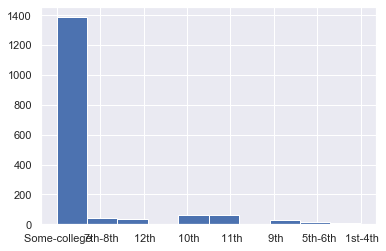

In [21]:
df[(df['salary'] == ' >50K') & (df['education'].isin(non_college))]['education'].hist()

## Display age statistics for each race (race feature) and each gender (sex feature)

In [22]:
df[['race', 'sex', 'age']].groupby(['race', 'sex']).describe()

age                                          \
                               count       mean        std   min   25%   50%   
race                sex                                                        
 Amer-Indian-Eskimo  Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                     Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
 Asian-Pac-Islander  Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                     Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
 Black               Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                     Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
 Other               Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                     Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
 White               Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                     Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                                          
                               75%   max  
race                sex                   
 Amer-Indian-Eskimo  Female  46.00  80.0  
                     Male    45.00  82.0  
 Asian-Pac-Islander  Female  43.75  75.0  
                     Male    46.00  90.0  
 Black               Female  46.00  90.0  
                     Male    46.00  90.0  
 Other               Female  39.00  74.0  
                     Male    42.00  77.0  
 White               Female  46.00  90.0  
                     Male    49.00  90.0

## Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? 

In [23]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [24]:
map = df['marital-status'].str.startswith(' Marr', na = False)
df['status'] = map
df[['status', 'marital-status', 'salary']].groupby(['status', 'salary']).count()

marital-status
status salary                
False   <=50K           16039
        >50K             1105
True    <=50K            8681
        >50K             6736

## What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [25]:
max_num = df['hours-per-week'].max()
max_num

99

In [26]:
df[df['hours-per-week'] == max_num][['salary', 'sex', 'fnlwgt']].groupby(['salary', 'sex']).count()

fnlwgt
salary sex            
 <=50K  Female      18
        Male        42
 >50K   Female       1
        Male        24

In [27]:
out = df[df['hours-per-week'] == max_num][['salary', 'fnlwgt']].groupby(['salary']).count()/df[df['hours-per-week'] == max_num][['salary', 'fnlwgt']].count()
out.iloc[:,0:1]

,fnlwgt
salary,
<=50K,0.705882
>50K,0.294118


## Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

In [28]:
df[df['salary'] == ' >50K'][['native-country', 'hours-per-week']].groupby('native-country').mean().sort_values('hours-per-week', ascending = False)

,hours-per-week
native-country,
Honduras,60.000000
Thailand,58.333333
South,51.437500
France,50.750000
Greece,50.625000
Columbia,50.000000
Hungary,50.000000
Yugoslavia,49.500000
Ecuador,48.750000


In [29]:
df[(df['salary'] == ' >50K') & (df['native-country'] == ' Japan')][['hours-per-week']].mean()

hours-per-week    47.958333
dtype: float64